In [1]:
import pandas as pd
import requests
import re

# Function to resolve the shortened URL
def resolve_shortened_url(short_url):
    try:
        # Send a GET request to the shortened URL
        response = requests.get(short_url, allow_redirects=True)
        return response.url
    except requests.RequestException as e:
        print(f"Error resolving shortened URL: {e}")
        return None

# Function to extract coordinates from the resolved URL
def extract_coordinates_from_url(url):
    # Regular expression to find the latitude and longitude in the URL
    match = re.search(r'@?([-]?\d{1,3}\.\d+),([-]?\d{1,3}\.\d+)', url)
    if match:
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        return latitude, longitude
    else:
        return None, None

# Example CSV file path (update as needed)
csv_file = r'C:\Users\ASUS\Downloads\Copy of Gateways2k24collegenames(1).csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Check if the 'college location' column exists
if 'college location' in df.columns:
    # Loop through each URL in the 'college location' column
    df['latitude'] = None
df['longitude'] = None

for index, address in enumerate(df['college location']):
    resolved_url = resolve_shortened_url(address)
    # print(f"Resolved URL: {resolved_url}")

    if resolved_url:
        lat, lng = extract_coordinates_from_url(resolved_url)
        if lat is not None and lng is not None:
            df.at[index, 'latitude'] = lat
            df.at[index, 'longitude'] = lng
        else:
            print(f"No coordinates found for address: {address}")

else:
    print("Column 'college location' not found in the DataFrame.")


Column 'college location' not found in the DataFrame.


In [2]:
df.head(30)

,Sno,college name,college location,latitude,longitude
0,1,Indo Asian Academy Group of Institutions,https://maps.app.goo.gl/LBKr2is3RzdhrdMm7,13.027,77.636206
1,2,"Kristu Jayanti College, Autonomous",https://maps.app.goo.gl/PLeMR3bucmaeBHwYA,13.057942,77.642963
2,3,AIMS Institutes,https://maps.app.goo.gl/zw8TQXShJBrqdw1T9,13.035168,77.519798
3,4,Ramaiah Institute of Technology,https://maps.app.goo.gl/EYUKPkHvLfzMNUBH9,13.030764,77.565146
4,5,Presidency College,https://maps.app.goo.gl/2eRgSchHNnK62s5h7,13.050193,77.597946
5,6,Sir M. Visvesvaraya Institute of Technology,https://maps.app.goo.gl/f7w6SPAL6HMMkFQt9,13.151041,77.610017
6,7,Nitte Meenakshi Institute of Technology,https://maps.app.goo.gl/5Froq4tEwDt7hoUk6,13.129463,77.587659
7,8,Presidency University- Computer Science and En...,https://maps.app.goo.gl/QkfGWZH2NVoU6ZMj8,13.169435,77.533501
8,9,REVA UNIVERSITY,https://maps.app.goo.gl/ypRkg7krnGfnccsr5,13.116874,77.634612
9,10,Brindavan College of Engineering,https://maps.app.goo.gl/C4xEFifNTbC9bfKt8,13.124709,77.620417


In [3]:
import requests
import pandas as pd

API_KEY = 'your_maps_api'

def get_distance(api_key, origin, destination):
    """Get distance between two coordinates using Google Distance API."""
    url = f"https://maps.googleapis.com/maps/api/distancematrix/json?origins={origin}&destinations={destination}&key={api_key}"
    
    response = requests.get(url)
    data = response.json()

    # Check if the response is valid
    if data['status'] == 'OK':
        return data['rows'][0]['elements'][0]['distance']['value']  # Return distance in meters
    else:
        print("Error in API response:", data['status'])
        return None

start_coordinate = (12.93616, 77.60617)

In [4]:
import numpy as np
import itertools
from scipy.spatial.distance import pdist, squareform

# Function to calculate the distance between two coordinates using the API
def get_distance_matrix(API_KEY, coordinates):
    """
    Get the distance matrix for all coordinates, including the start point.
    This function returns an NxN matrix, where each entry (i, j) is the distance
    from point i to point j.
    """
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            dist = get_distance(API_KEY, f"{coordinates[i][0]},{coordinates[i][1]}", 
                                         f"{coordinates[j][0]},{coordinates[j][1]}")
            if dist is not None:
                distance_matrix[i, j] = dist
                distance_matrix[j, i] = dist  # symmetric matrix
            else:
                print(f"Failed to get distance between {coordinates[i]} and {coordinates[j]}.")
    
    return distance_matrix

# Function to solve the TSP using brute force (can be replaced by a more efficient algorithm)
def solve_tsp(distance_matrix):
    """
    Solves the Traveling Salesman Problem (TSP) using brute force.
    Returns the optimal route and the corresponding distance.
    """
    n = len(distance_matrix)
    all_permutations = itertools.permutations(range(1, n))  # Exclude the start point (0)
    
    min_route = None
    min_distance = float('inf')
    
    for perm in all_permutations:
        route = (0,) + perm + (0,)  # Start and end at the start point (0)
        distance = sum(distance_matrix[route[i], route[i+1]] for i in range(len(route)-1))
        
        if distance < min_distance:
            min_distance = distance
            min_route = route
            
    return min_route, min_distance



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


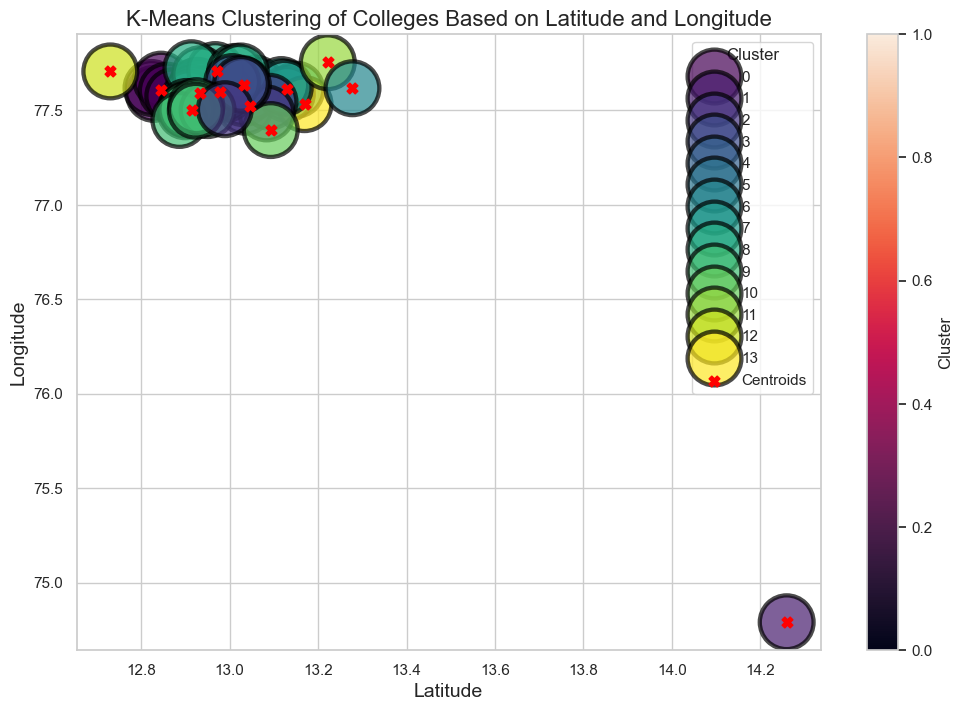

                                         college name   latitude  longitude  \
0            Indo Asian Academy Group of Institutions     13.027  77.636206   
1                  Kristu Jayanti College, Autonomous  13.057942  77.642963   
2                                     AIMS Institutes  13.035168  77.519798   
3                     Ramaiah Institute of Technology  13.030764  77.565146   
4                                  Presidency College  13.050193  77.597946   
5         Sir M. Visvesvaraya Institute of Technology  13.151041  77.610017   
6             Nitte Meenakshi Institute of Technology  13.129463  77.587659   
7   Presidency University- Computer Science and En...  13.169435  77.533501   
8                                     REVA UNIVERSITY  13.116874  77.634612   
9                    Brindavan College of Engineering  13.124709  77.620417   
10             Sambhram Academy Of Management Studies  13.090292  77.545915   
11                    Acharya Institute of Technolog

In [12]:
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming df contains columns 'college name', 'latitude', 'longitude'
X = df[['latitude', 'longitude']].values

# KMeans clustering with 14 clusters
kmeans = KMeans(n_clusters=14, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Seaborn style for a better aesthetic
sns.set(style="whitegrid")

# Create a figure and axis for better customization
plt.figure(figsize=(12, 8))

# Scatter plot using Seaborn for enhanced visualization
sns.scatterplot(
    x='latitude', 
    y='longitude', 
    hue='Cluster', 
    palette='viridis', 
    data=df, 
    s=1500,  # Point size
    edgecolor='black', 
    alpha=0.7,  # Transparency
    legend='full'  # Full legend to display cluster colors
)

# Marking cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=60, marker='X', label='Centroids')

# Add title and labels
plt.title('K-Means Clustering of Colleges Based on Latitude and Longitude', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)

# Add a legend for the clusters
plt.legend(title="Cluster", loc='best')

# Show plot with colorbar
plt.colorbar(label='Cluster')
plt.show()

# Print cluster assignments
print(df[['college name', 'latitude', 'longitude', 'Cluster']])


In [13]:
unique_clusters = df['Cluster'].unique()

# Create an empty dictionary to store the cluster dataframes
cluster_dfs = {}

# Loop through each unique cluster value and filter rows
for cluster in unique_clusters:
    cluster_dfs[f'Cluster_{cluster}'] = df[df['Cluster'] == cluster][['college name', 'college location', 'latitude', 'longitude']]

# Optionally, print the clusters
for cluster_name, cluster_df in cluster_dfs.items():
    print(f"{cluster_name}:\n", cluster_df)

Cluster_3:
                                        college name  \
0          Indo Asian Academy Group of Institutions   
1                Kristu Jayanti College, Autonomous   
4                                Presidency College   
41  CMR University (Satellite Campus - OMBR Layout)   
42      Indian Academy Degree College - Autonomous:   
43                           Bangalore City College   

                             college location   latitude  longitude  
0   https://maps.app.goo.gl/LBKr2is3RzdhrdMm7     13.027  77.636206  
1   https://maps.app.goo.gl/PLeMR3bucmaeBHwYA  13.057942  77.642963  
4   https://maps.app.goo.gl/2eRgSchHNnK62s5h7  13.050193  77.597946  
41  https://maps.app.goo.gl/aDrvqHYGmh7JdUuw6  13.005918  77.650375  
42  https://maps.app.goo.gl/2WkqpCWTnF9D923k9  13.030133  77.635579  
43  https://maps.app.goo.gl/pktC1P3efDNgAZw46  13.025844  77.641352  
Cluster_2:
                               college name  \
2                          AIMS Institutes   
3       

In [14]:
# cluster_dfs['Cluster_13'].head()
clusters_ =[cluster_dfs['Cluster_0'],cluster_dfs['Cluster_1'],cluster_dfs['Cluster_2'],cluster_dfs['Cluster_3'],cluster_dfs['Cluster_4'],cluster_dfs['Cluster_5'],cluster_dfs['Cluster_6'],cluster_dfs['Cluster_7'],cluster_dfs['Cluster_8'],cluster_dfs['Cluster_9'],cluster_dfs['Cluster_10'],cluster_dfs['Cluster_11'],cluster_dfs['Cluster_12'],cluster_dfs['Cluster_13']]

In [15]:
cluster_names_ = [f"cluster_{i+1}" for i in range(len(clusters_))] 
processed_clusters = []
for cluster_name, cluster in zip(cluster_names_, clusters_):
    print(f"Calculating optimal route for {cluster_name}...")
    
    # Extract destination coordinates from each cluster
    destination_coords = list(zip(cluster['latitude'], cluster['longitude']))

    # Add the starting point to the destination list
    coordinates = [start_coordinate] + destination_coords
    
    # Get the distance matrix for all points
    distance_matrix = get_distance_matrix(API_KEY, coordinates)

    # Solve the TSP to get the optimal route and the minimum distance
    optimal_route, total_distance = solve_tsp(distance_matrix)
    
    print(f"Optimal route for {cluster_name}: {optimal_route}")
    print(f"Total distance for {cluster_name}: {total_distance} km")
    
    # Prepare the optimized route
    # Exclude the starting point from the route for the DataFrame
    optimized_route = [optimal_route[i] for i in range(1, len(optimal_route)-1)]
    
    # Update the DataFrame with the visit order and total distance
    cluster['optimized_route'] = optimized_route  # Store the visit order (excluding start/end point)
    cluster['total_distance'] = total_distance/1000  # Set the total distance for all rows in the cluster
    cluster['Cluster_Tag'] = cluster_name  # Add a tag for the cluster
    
    # Append the modified cluster to the processed list
    processed_clusters.append(cluster)

# Concatenate all clusters into a single DataFrame
consolidated_df_ = pd.concat(processed_clusters, ignore_index=True)

# Display the consolidated DataFrame
print(consolidated_df_.head(2))

Calculating optimal route for cluster_1...
Optimal route for cluster_1: (0, 3, 2, 1, 5, 4, 0)
Total distance for cluster_1: 51051.0 km
Calculating optimal route for cluster_2...
Optimal route for cluster_2: (0, 1, 0)
Total distance for cluster_2: 848756.0 km
Calculating optimal route for cluster_3...
Optimal route for cluster_3: (0, 2, 3, 4, 1, 5, 0)
Total distance for cluster_3: 68502.0 km
Calculating optimal route for cluster_4...
Optimal route for cluster_4: (0, 3, 2, 5, 1, 6, 4, 0)
Total distance for cluster_4: 49868.0 km
Calculating optimal route for cluster_5...
Optimal route for cluster_5: (0, 1, 2, 3, 4, 0)
Total distance for cluster_5: 21409.0 km
Calculating optimal route for cluster_6...
Optimal route for cluster_6: (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 0)
Total distance for cluster_6: 32414.0 km
Calculating optimal route for cluster_7...
Optimal route for cluster_7: (0, 1, 0)
Total distance for cluster_7: 89928.0 km
Calculating optimal route for cluster_8...
Optimal route for c

In [18]:
consolidated_df_.groupby('Cluster_Tag').head(40)

,college name,college location,latitude,longitude,optimized_route,total_distance,Cluster_Tag
0,AMC Engineering College,https://maps.app.goo.gl/yVNxCW6wqq7UHrKGA,12.828787,77.587823,3,51.051,cluster_1
1,Christ Academy Institute for Advanced Studies ...,https://maps.app.goo.gl/61wjiaYCFfzcpF7y6,12.823653,77.619131,2,51.051,cluster_1
2,International Institute of Information Technol...,https://maps.app.goo.gl/nYiTkbYEQwaaw1jf6,12.84496,77.663216,1,51.051,cluster_1
3,Rathinam Institutions,https://maps.app.goo.gl/yRLgN4itLBxd6RZu9,12.858028,77.604933,5,51.051,cluster_1
4,RV INSTITUTE OF TECHNOLOGY AND MANAGEMENT,https://maps.app.goo.gl/6M2oZmgK4fatJusQ7,12.87286,77.575872,4,51.051,cluster_1
5,Visvesvaraya Technological University (VTU),https://maps.app.goo.gl/1jN83c3Qk8kkteij6,14.259276,74.79002,1,848.756,cluster_2
6,AIMS Institutes,https://maps.app.goo.gl/zw8TQXShJBrqdw1T9,13.035168,77.519798,2,68.502,cluster_3
7,Ramaiah Institute of Technology,https://maps.app.goo.gl/EYUKPkHvLfzMNUBH9,13.030764,77.565146,3,68.502,cluster_3
8,Sambhram Academy Of Management Studies,https://maps.app.goo.gl/EykXiiaDj9hMQXkE7,13.090292,77.545915,4,68.502,cluster_3
9,Acharya Institute of Technology,https://maps.app.goo.gl/YKUnLNL6gJa438Ga9,13.083719,77.484473,1,68.502,cluster_3
